## 1. 데이터 로드 및 구조 확인

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

iris.head()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2. 기술통계량

In [19]:
# Species별 Petal Length의 기술통계량 (개수, 평균, 표준편차, 최소, 사분위수, 최대)
desc_stats = iris.groupby('species')['petal_length'].describe()
print(desc_stats)

print("")

# 그룹별 데이터 개수 확인 
counts = iris['species'].value_counts()
print(counts)

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## 3. 시각화


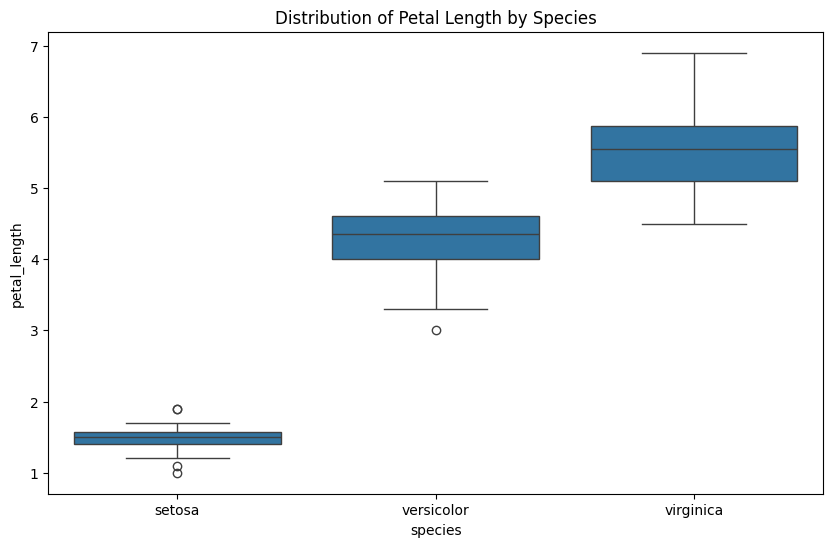

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Distribution of Petal Length by Species')
plt.show()

## 4. 정규성 검정

In [38]:
from scipy.stats import shapiro

# 종에 따른 꽃잎 길이의 Shapiro-Wilk 검정
for species in iris['species'].unique():
    sample = iris[iris['species'] == species]['petal_length']
    stat, p = shapiro(sample)
    print(f"{species} - Shapiro-Wilk Test: Statistics={stat:.4f}, p-value={p:.4f}")
    
    if p > 0.05:
        print(f"  -> p-value > 0.05이므로 귀무가설을 채택하여 정규성을 만족합니다.")
    else:
        print(f"  -> p-value <= 0.05이므로 귀무가설을 기각하여 정규성을 만족합니다.")

setosa - Shapiro-Wilk Test: Statistics=0.9550, p-value=0.0548
  -> p-value > 0.05이므로 귀무가설을 채택하여 정규성을 만족합니다.
versicolor - Shapiro-Wilk Test: Statistics=0.9660, p-value=0.1585
  -> p-value > 0.05이므로 귀무가설을 채택하여 정규성을 만족합니다.
virginica - Shapiro-Wilk Test: Statistics=0.9622, p-value=0.1098
  -> p-value > 0.05이므로 귀무가설을 채택하여 정규성을 만족합니다.


## 5. 등분산성 검정

In [39]:
from scipy.stats import levene

# 종에 따른 꽃잎 길이의 분산을 비교하여 Levene 검정을 수행
s1 = iris[iris['species'] == 'setosa']['petal_length']
s2 = iris[iris['species'] == 'versicolor']['petal_length']
s3 = iris[iris['species'] == 'virginica']['petal_length']

stat, p = levene(s1, s2, s3)
print(f"Levene 검정 결과: Statistics={stat:.4f}, p-value={p:.4f}")

if p > 0.05:
    print("p-value > 0.05이므로 귀무가설을 채택하여 세 그룹의 분산이 동일하다고 볼 수 있습니다.")
else:
    print("p-value <= 0.05이므로 귀무가설을 기각하여 적어도 한 그룹의 분산이 다르다고 판단됩니다.")

Levene 검정 결과: Statistics=19.4803, p-value=0.0000
p-value <= 0.05이므로 귀무가설을 기각하여 적어도 한 그룹의 분산이 다르다고 판단됩니다.


## 6. ANOVA 가설 수립

- $H_0$: 세 species 간 petal_length의 평균이 동일하다.
- $H_1$: 적어도 한 species의 petal_length의 평균이 다르다.

## 7. One-way ANOVA

In [44]:
from scipy.stats import f_oneway

# 종별 꽃잎 길이 그룹 생성
s1 = iris[iris['species'] == 'setosa']['petal_length']
s2 = iris[iris['species'] == 'versicolor']['petal_length']
s3 = iris[iris['species'] == 'virginica']['petal_length']

# One-way ANOVA 실시
f_stat, p_val = f_oneway(s1, s2, s3)

print(f"One-way ANOVA 결과: F-value = {f_stat:.4f}, p-value = {p_val:.4f}")

# 유의수준 0.05 기준으로 귀무가설 기각 여부 확인
if p_val < 0.05:
    print("결론: p-value가 0.05보다 작으므로 귀무가설을 기각합니다.")
else:
    print("결론: p-value가 0.05보다 크므로 귀무가설을 기각할 수 없습니다.")

One-way ANOVA 결과: F-value = 1180.1612, p-value = 0.0000
결론: p-value가 0.05보다 작으므로 귀무가설을 기각합니다.


## 8. 사후검정

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD 사후검정 실시
tukey = pairwise_tukeyhsd(endog=iris['petal_length'], groups=iris['species'], alpha=0.05)

print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


## 9. 결과 요약

Boxplot, ANOVA, 사후검정 결과를 종합한 결과, 세 품종(Setosa, Versicolor, Virginica) 간의 꽃잎 길이의 평균은 통계적으로 유의미한 차이가 있음을 확인하였습니다. 이는 시각화에서 시각적으로 분석한 바와 동일합니다. 특히 Setosa의 Petal Length가 가장 짧으며, Virginica가 가장 긴 것으로 보입니다. Tukey HSD를 통한 사후검정 결과 One-Way ANOVA의 결과가 검증되어 모든 품종 쌍 사이에서 유의미한 평균 차이가 존재함을 알 수 있습니다.

## 10. 회귀분석

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 입력 변수(X)와 타겟 변수(y) 설정
X = iris[['sepal_length', 'sepal_width', 'petal_width']]
y = iris['petal_length']

# Train/Test 데이터 분리 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression 모델 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = lr_model.predict(X_test)

# 성능 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"평균제곱오차(MSE): {mse:.4f}")
print(f"결정계수(R²): {r2:.4f}")
print("\n회귀계수(Coefficients):")
for col, coef in zip(X.columns, lr_model.coef_):
    print(f"{col}: {coef:.4f}")
print(f"절편(Intercept): {lr_model.intercept_:.4f}")

평균제곱오차(MSE): 0.1300
결정계수(R²): 0.9603

회귀계수(Coefficients):
sepal_length: 0.7228
sepal_width: -0.6358
petal_width: 1.4675
절편(Intercept): -0.2622
